In [2]:
from google.colab import drive
import pandas as pd, numpy as np, seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
df = pd.read_csv('final_dataset1.csv')
df = df.iloc[:,1:]
df

,Open1,Open2,Open3,Open4,Open5,High1,High2,High3,High4,High5,...,Neutral4,Neutral5,Negative1,Negative2,Negative3,Negative4,Negative5,High,Low,Close
0,79.382858,79.167145,79.637146,80.545715,81.157143,79.575714,80.182854,80.012856,80.629997,81.357140,...,0,0,6,0,0,0,0,79.099998,77.204285,77.282860
1,78.980003,79.382858,79.167145,79.637146,80.545715,79.099998,79.575714,80.182854,80.012856,80.629997,...,0,0,7,6,0,0,0,78.114288,76.228569,77.704285
2,76.778572,78.980003,79.382858,79.167145,79.637146,78.114288,79.099998,79.575714,80.182854,80.012856,...,0,0,4,7,6,0,0,77.994286,76.845711,77.148575
3,77.760002,76.778572,78.980003,79.382858,79.167145,77.994286,78.114288,79.099998,79.575714,80.182854,...,12,0,5,4,7,6,0,77.937141,76.955711,77.637146
4,76.972855,77.760002,76.778572,78.980003,79.382858,77.937141,77.994286,78.114288,79.099998,79.575714,...,6,12,0,5,4,7,6,78.122856,76.478569,76.645714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,107.010002,108.580002,106.959999,107.589996,109.000000,107.029999,108.699997,109.430000,107.690002,109.000000,...,16,5,3,5,2,1,5,105.370003,102.000000,105.349998
504,102.610001,107.010002,108.580002,106.959999,107.589996,105.370003,107.029999,108.699997,109.430000,107.690002,...,14,16,0,3,5,2,1,105.849998,102.410004,102.709999
505,105.750000,102.610001,107.010002,108.580002,106.959999,105.849998,105.370003,107.029999,108.699997,109.430000,...,14,14,0,0,3,5,2,102.370003,99.870003,100.699997
506,100.559998,105.750000,102.610001,107.010002,108.580002,102.370003,105.849998,105.370003,107.029999,108.699997,...,13,14,0,0,0,3,5,100.129997,96.430000,96.449997


In [7]:
# df.isnull().sum()

###Handling missing values

In [8]:
def test_train_val_split(X,Y,test_percentage,train_percentage,val_percentage):
  # training : test : validation
  #    70    :  15  :    15

  temp = np.append(X,np.swapaxes(np.array([Y]),0,1),axis=1)
  np.random.shuffle(temp)

  tot = temp[:,0].size

  idx1 = (70*tot)//100
  idx2 = (85*tot)//100

  X_train = temp[:idx1,:-1]
  Y_train = temp[:idx1,-1]
  X_val = temp[idx1:idx2,:-1]
  Y_val = temp[idx1:idx2,-1]
  X_test = temp[idx2:,:-1]
  Y_test = temp[idx2:,-1]

  # print("training set size:",Y_train.size,"\nvalidation set size:",Y_val.size,"\ntesting set size:",Y_test.size)

  return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
df

,Open1,Open2,Open3,Open4,Open5,High1,High2,High3,High4,High5,...,Neutral2,Neutral3,Neutral4,Neutral5,Negative1,Negative2,Negative3,Negative4,Negative5,Close
0,97.207146,96.864288,96.167145,96.510002,95.108574,97.612854,97.497147,96.898575,96.621429,96.448570,...,0,0,0,0,0,0,0,0,0,94.370003
1,95.015717,97.207146,96.864288,96.167145,96.510002,95.728569,97.612854,97.497147,96.898575,96.621429,...,0,0,0,0,0,0,0,0,0,95.684288
2,95.264282,95.015717,97.207146,96.864288,96.167145,95.699997,95.728569,97.612854,97.497147,96.898575,...,0,0,0,0,0,0,0,0,0,97.568573
3,96.767143,95.264282,95.015717,97.207146,96.864288,97.928574,95.699997,95.728569,97.612854,97.497147,...,0,0,0,0,0,0,0,0,0,98.754288
4,98.565712,96.767143,95.264282,95.015717,97.207146,99.568573,97.928574,95.699997,95.728569,97.612854,...,0,0,0,0,0,0,0,0,0,99.968575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,159.649994,160.429993,159.070007,158.229996,157.500000,160.559998,160.740005,160.470001,160.000000,157.889999,...,0,0,0,0,0,0,0,0,0,161.470001
1249,160.139999,159.649994,160.429993,159.070007,158.229996,162.000000,160.559998,160.740005,160.470001,160.000000,...,0,0,0,0,0,0,0,0,0,162.910004
1250,160.100006,160.139999,159.649994,160.429993,159.070007,163.119995,162.000000,160.559998,160.740005,160.470001,...,0,0,0,0,0,0,0,0,0,163.350006
1251,163.800003,160.100006,160.139999,159.649994,160.429993,163.889999,163.119995,162.000000,160.559998,160.740005,...,0,0,0,0,0,0,0,0,0,164.000000


In [10]:
# df = df.drop('Date',axis=1)
# df.drop('High',axis = 1,inplace=True)
# df.drop('Low',axis = 1,inplace=True)
# df.drop('Volume',axis = 1,inplace=True)
# df.drop('Adj Close',axis=1,inplace = True)

In [11]:
X = df.drop('Close',axis=1)
Y = df['Close']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# print(X)
# print(Y)

In [12]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = test_train_val_split(X,Y,30,70,0)

In [13]:
len(X_train)

355

In [ ]:
lr = LinearRegression().fit(X_train,Y_train)

In [ ]:
Y_pred = lr.predict(X_test)

In [14]:
regr = MLPRegressor( max_iter=1000,verbose=True, hidden_layer_sizes = (1024,512,512,128),solver='lbfgs').fit(X_train, Y_train)
# regr.predict(X_test[:2])

y_pred = regr.predict(X_test)

mean_squared_error(Y_test, y_pred)


4.4268361546404575

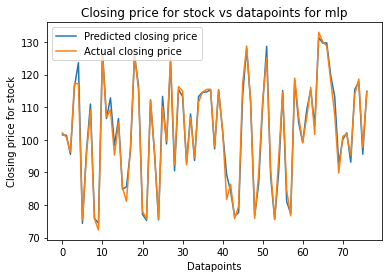

In [21]:
import matplotlib.pyplot as plt

plt.plot(y_pred)
# plt.show()
plt.plot(Y_test)
plt.title('Closing price for stock vs datapoints for mlp')
plt.xlabel("Datapoints")
plt.ylabel("Closing price for stock")
plt.legend(["Predicted closing price",'Actual closing price'])
plt.show()

In [ ]:
regr2 = MLPRegressor( max_iter=10000,verbose=True, hidden_layer_sizes = (1024,512,512,128),solver='lbfgs').fit(X_train, Y_train)
# regr.predict(X_test[:2])

y_pred2 = regr.predict(X_test)

mean_squared_error(Y_test, y_pred2)

8.023242834243439

In [ ]:
regr2 = MLPRegressor( max_iter=10000,verbose=True, hidden_layer_sizes = (1024,512,512),solver='lbfgs').fit(X_train, Y_train)
# regr.predict(X_test[:2])

y_pred2 = regr.predict(X_test)

mean_squared_error(Y_test, y_pred2)

8.023242834243439

In [ ]:
# print(Y_pred)
# print(Y_test)

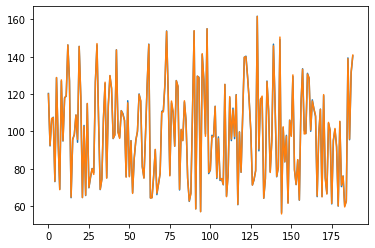

In [ ]:
import matplotlib.pyplot as plt

plt.plot(Y_pred)
# plt.show()
plt.plot(Y_test)
plt.show()

In [ ]:
n = int(input())

5


In [ ]:
def create_data(n):

  #  Date shouldnt be in df
  df1 = df.copy(True)
  idx = 1
  for i in range(n,0,-1):
    name = "Open"+str(i)
    array = df.iloc[:-i,0].values
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "High"+str(i)
    array = df.iloc[:-i,1].values
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "Low"+str(i)
    array = df.iloc[:-i,2].values
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "Close"+str(i)
    array = df.iloc[:-i,3].values
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "Adj Close"+str(i)
    array = df.iloc[:-i,4].values
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "Volume"+str(i)
    array = df.iloc[:-i,5].values
    array = array.astype('float64')
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "Positive"+str(i)
    array = df.iloc[:-i,6].values
    array = array.astype('float64')
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "Neutral"+str(i)
    array = df.iloc[:-i,7].values
    array = array.astype('float64')
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  idx += n+1
  for i in range(n,0,-1):
    name = "Negative"+str(i)
    array = df.iloc[:-i,8].values
    array = array.astype('float64')
    for j in range(i):
      array = np.insert(array,0,np.nan)
    df1.insert(loc = idx,column = name,value = array)
  df1 = df1.drop("Open",axis=1)
  # df1 = df1.drop("High",axis=1)
  # df1 = df1.drop("Low",axis=1)
  df1 = df1.drop("Adj Close",axis=1)
  df1 = df1.drop("Volume",axis=1)
  df1 = df1.drop("Positive",axis=1)
  df1 = df1.drop("Neutral",axis=1)
  df1 = df1.drop("Negative",axis=1)

  for i in range(n):
    df1 = df1.drop([i],axis = 0)
  df1.reset_index(inplace = True)
  df1 = df1.drop("index",axis=1)
  return df1

In [ ]:
# df1 = create_data(n)
# df1

,Open1,Open2,Open3,Open4,Open5,High,High1,High2,High3,High4,...,Neutral1,Neutral2,Neutral3,Neutral4,Neutral5,Negative1,Negative2,Negative3,Negative4,Negative5
0,97.207146,96.864288,96.167145,96.510002,95.108574,95.728569,97.612854,97.497147,96.898575,96.621429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,95.015717,97.207146,96.864288,96.167145,96.510002,95.699997,95.728569,97.612854,97.497147,96.898575,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,95.264282,95.015717,97.207146,96.864288,96.167145,97.928574,95.699997,95.728569,97.612854,97.497147,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,96.767143,95.264282,95.015717,97.207146,96.864288,99.568573,97.928574,95.699997,95.728569,97.612854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,98.565712,96.767143,95.264282,95.015717,97.207146,99.971428,99.568573,97.928574,95.699997,95.728569,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,159.649994,160.429993,159.070007,158.229996,157.500000,162.000000,160.559998,160.740005,160.470001,160.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1249,160.139999,159.649994,160.429993,159.070007,158.229996,163.119995,162.000000,160.559998,160.740005,160.470001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1250,160.100006,160.139999,159.649994,160.429993,159.070007,163.889999,163.119995,162.000000,160.559998,160.740005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1251,163.800003,160.100006,160.139999,159.649994,160.429993,164.520004,163.889999,163.119995,162.000000,160.559998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# from google.colab import files
# import pandas as pd
# df1.to_csv('final_dataset.csv')
# files.download('final_dataset.csv')

NameError: ignored